In [4]:
# import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [5]:
# import
df = pd.read_csv('../beb_chargers/data/weather/weather_mar2024_seattleBoeingAirport_NCEI.csv')

In [6]:
# columns
# location
loc_cols = ['NAME', 'LATITUDE', 'LONGITUDE']
hourly_cols = [
    'HourlyDewPointTemperature',
    'HourlyDryBulbTemperature',
    'HourlyWetBulbTemperature',
    'HourlyPrecipitation',
    'HourlyRelativeHumidity',
    'HourlySkyConditions',
    'HourlyWindDirection',
    'HourlyWindSpeed',
]

useful_cols = loc_cols + hourly_cols
useful_cols.append('DATE')
for col in useful_cols:
    print(col)

NAME
LATITUDE
LONGITUDE
HourlyDewPointTemperature
HourlyDryBulbTemperature
HourlyWetBulbTemperature
HourlyPrecipitation
HourlyRelativeHumidity
HourlySkyConditions
HourlyWindDirection
HourlyWindSpeed
DATE


In [7]:
df_hour = df[useful_cols].dropna(subset=['HourlyDewPointTemperature'])

df_hour['year'] = df_hour.DATE.apply(lambda x: datetime.fromisoformat(x).year)
df_hour['month'] = df_hour.DATE.apply(lambda x: datetime.fromisoformat(x).month)
df_hour['day'] = df_hour.DATE.apply(lambda x: datetime.fromisoformat(x).day)
df_hour['hour'] = df_hour.DATE.apply(lambda x: datetime.fromisoformat(x).hour)
df_hour['minute'] = df_hour.DATE.apply(lambda x: datetime.fromisoformat(x).minute)
# df_hour = df_hour.drop(columns='DATE')

In [8]:
sorted_cols = loc_cols + ['DATE', 'year', 'month', 'day', 'hour', 'minute'] + hourly_cols
df_hour = df_hour[sorted_cols]

# rename columns
df_hour = df_hour.rename(columns={
    'NAME': 'loc_weather', 
    'LATITUDE': 'lat',
    'LONGITUDE': 'lon',
    'DATE': 'date',
    'HourlyDewPointTemperature': 'dew_point_temp',
    'HourlyDryBulbTemperature': 'temp',
    'HourlyWetBulbTemperature': 'wet_bulb_temp',
    'HourlyPrecipitation': 'precipitation',
    'HourlyRelativeHumidity': 'relate_humid',
    'HourlySkyConditions': 'sky_cond',
    'HourlyWindDirection': 'wind_dir',
    'HourlyWindSpeed': 'wind_speed',
    })

In [9]:
# export cleaned data
# df_hour.to_csv('../beb_chargers/data/weather/cleaned_hourly_weather_mar2024.csv', index=False)

# Some simple data analysis for weather temperature

In [10]:
df_hour.head(1)

,loc_weather,lat,lon,date,year,month,day,hour,minute,dew_point_temp,temp,wet_bulb_temp,precipitation,relate_humid,sky_cond,wind_dir,wind_speed
0,"SEATTLE BOEING FIELD, WA US",47.54554,-122.31475,2024-03-01T00:51:00,2024,3,1,0,51,36.0,39.0,38.0,NaN,87.0,FEW:02 18 OVC:08 28,180,10.0


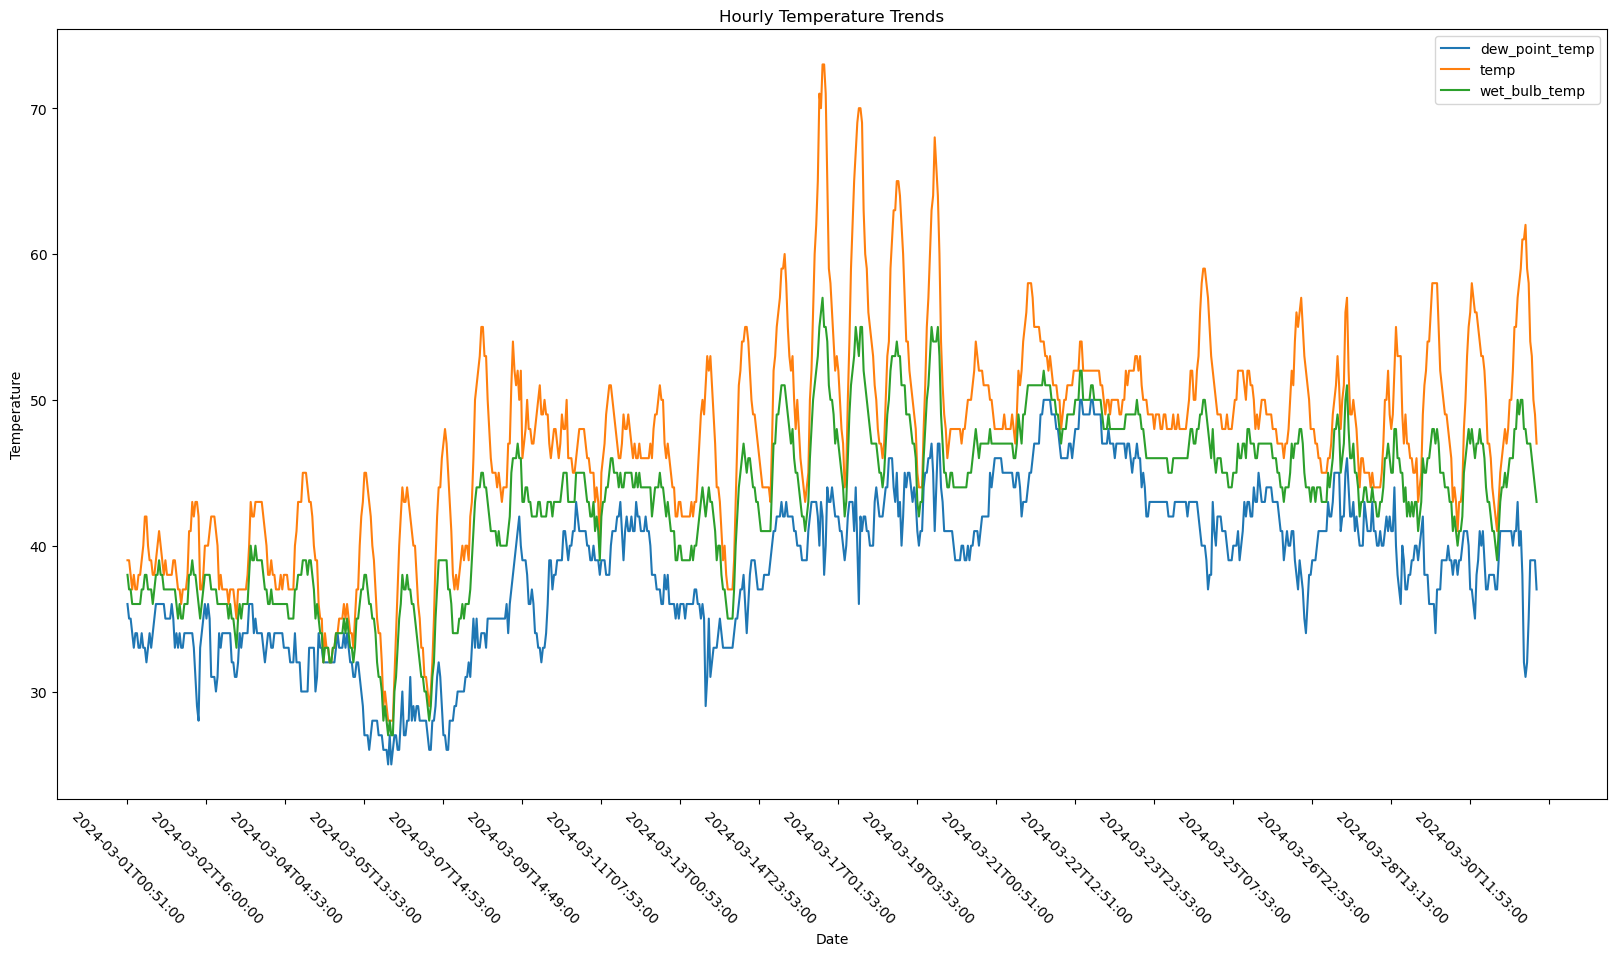

In [11]:
# Extract temperature columns
temperature_columns = [
    'dew_point_temp', 
    'temp', 
    'wet_bulb_temp',
]

# Plot each temperature variable
plt.figure(figsize=(20, 10))
for column in temperature_columns:
    sns.lineplot(x=df_hour.date, y=df_hour[column], label=column)
# sns.lineplot(x=df_hour['hour'], y=df_hour['HourlyDryBulbTemperature'], hue=df_hour['day'])

plt.xticks(rotation=-45)
n = 23
plt.gca().xaxis.set_major_locator(MaxNLocator(n))
plt.title('Hourly Temperature Trends')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
# plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


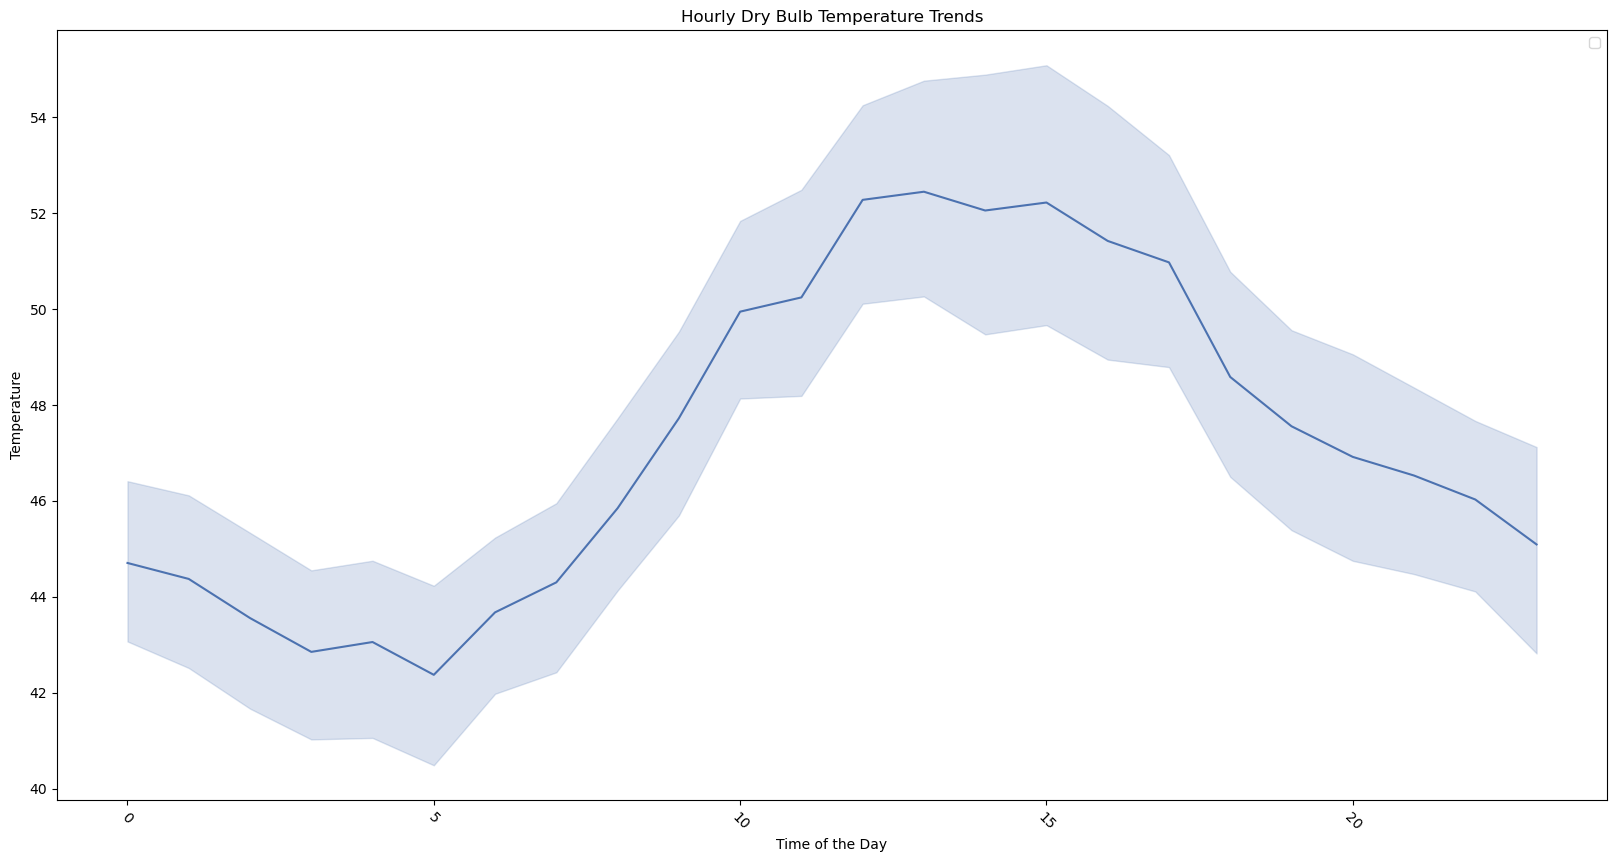

In [12]:
# Plot each temperature variable
plt.figure(figsize=(20, 10))
sns.set_palette("deep")
sns.lineplot(
    data=df_hour, 
    x='hour', 
    y='temp', 
)
plt.xticks(rotation=-45)
plt.title('Hourly Dry Bulb Temperature Trends')
plt.xlabel('Time of the Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

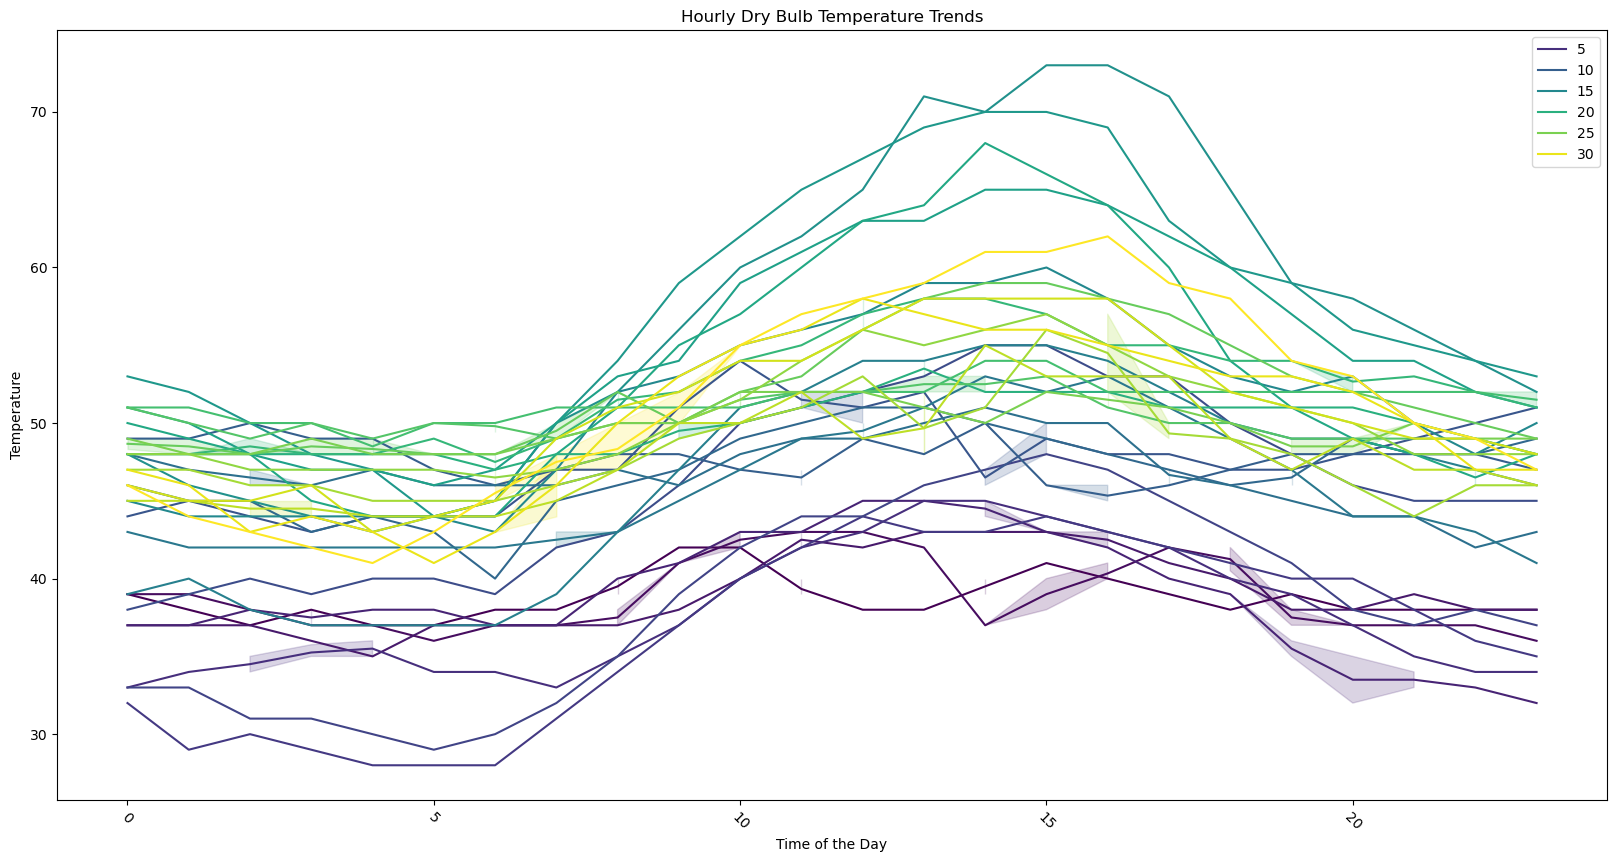

In [13]:
# Plot each temperature variable
plt.figure(figsize=(20, 10))

sns.lineplot(
    data=df_hour, 
    x='hour', 
    y='temp', 
    hue='day', 
    palette='viridis', 
)
plt.xticks(rotation=-45)
plt.title('Hourly Dry Bulb Temperature Trends')
plt.xlabel('Time of the Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


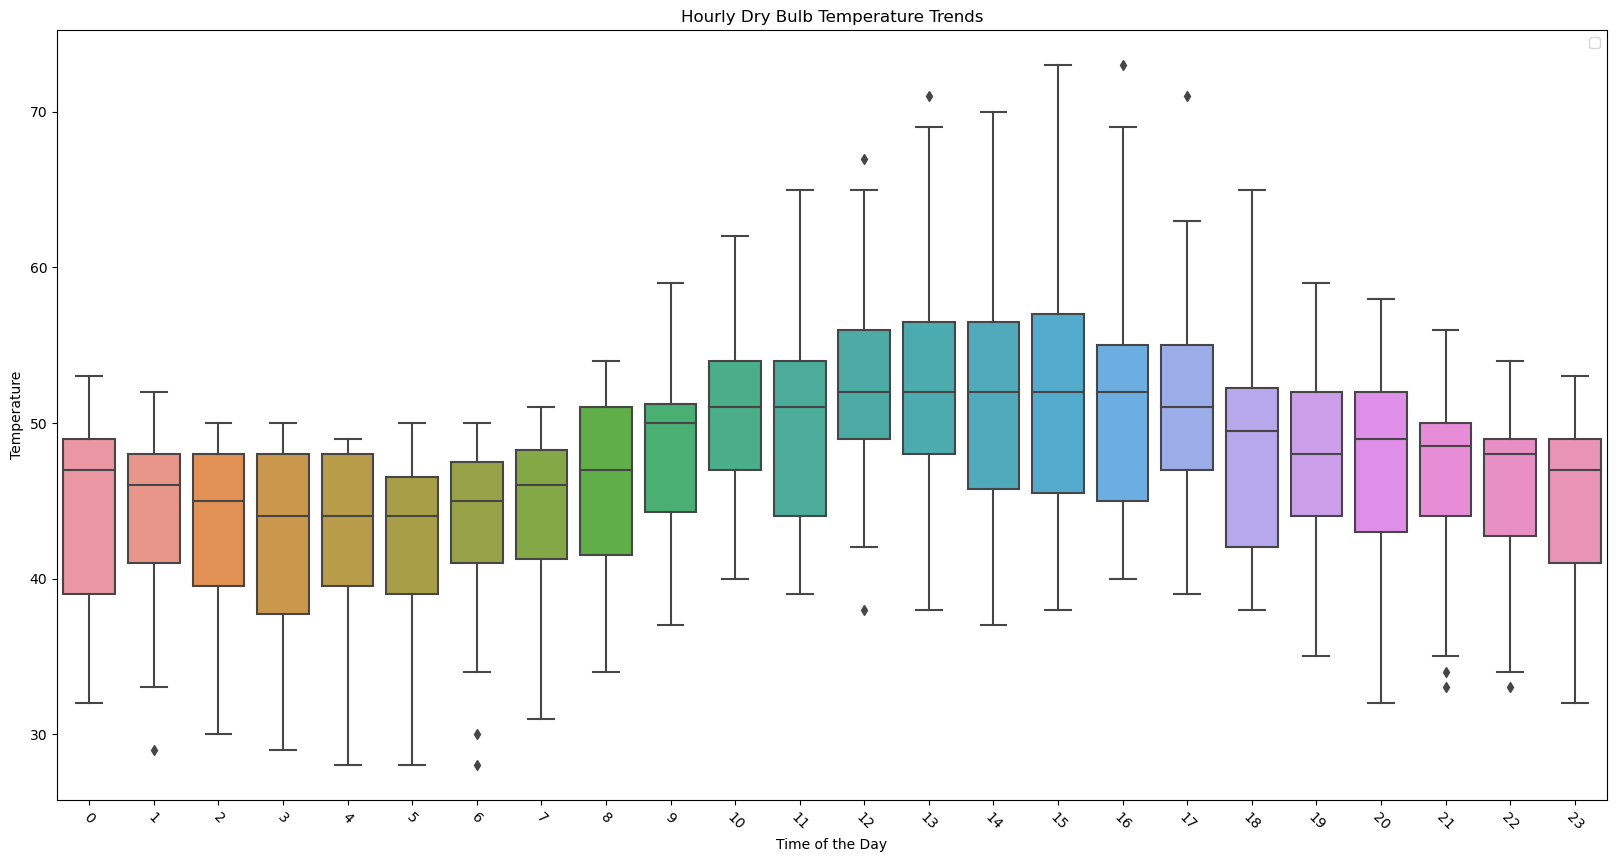

In [14]:
# Plot each temperature variable
plt.figure(figsize=(20, 10))

sns.boxplot(
    data=df_hour, 
    x='hour', 
    y='temp', 
)
plt.xticks(rotation=-45)
plt.title('Hourly Dry Bulb Temperature Trends')
plt.xlabel('Time of the Day')
plt.ylabel('Temperature')
plt.legend()
plt.show()